In [15]:
%matplotlib inline
from numpy import *
from numpy.linalg import *
from matplotlib.pyplot import *
import networkx as nx

In [16]:

def write_directed_vertex_list_to_file(g, filename):
    A=array(g.edges())
    A=append(A,A[:,[1,0]], axis=0)
    A=array(A[A[:,0].argsort()]).astype(int)
    savetxt(filename, A, fmt='%i')


def unique_rows(a):
    a = ascontiguousarray(a)
    unique_a = unique(a.view([('', a.dtype)]*a.shape[1]))
    return unique_a.view(a.dtype).reshape((unique_a.shape[0], a.shape[1]))


def to_undirected_vertex_list(A):
    AA=[[min(A[i]), max(A[i])] for i in range(shape(A)[0])]
    return unique_rows(AA).astype(int).tolist()

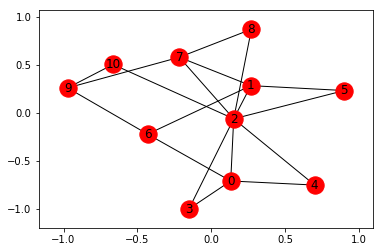

In [18]:
g=nx.barabasi_albert_graph(11, 2)
nx.draw_networkx(g)
write_directed_vertex_list_to_file(g,'parameters\\N0011_BA002_001.net')

In [ ]:
#A=loadtxt('N0010_BA002_001.net')
#g=nx.Graph(to_undirected_vertex_list(A))
#nx.draw_networkx(g)

In [ ]:
#w=random.rand(10)
#savetxt('N0010_U001.Freq', w, fmt='%f')

In [ ]:
#theta0=random.uniform(-pi,pi,10)
#savetxt('N0010_R001.Ic', theta, fmt='%f')

In [4]:
#theta1=random.uniform(-pi,pi,10)
#savetxt('N0010_R002.Ic', theta1, fmt='%f')

In [28]:
def generate_mean_zero_frequencies(n, a = pi, tol = 0.01):

    w = zeros(n)
    w[n-2] = -a
    w[n-1] = a

    for i in range(1000):
        w[range(n-2)] = random.uniform(-a,a,n-2)
        if abs(mean(w)) < 0.01:
            return(sort(w))
            break

    return nan

In [29]:
w = generate_mean_zero_frequencies(10)
savetxt('parameters/N0010_U001.Freq', w, fmt='%f')